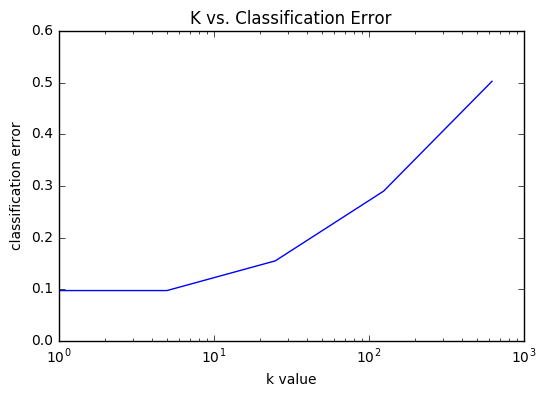

In [2]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt

df_train = pd.read_csv("../data/mnist_train.csv").sample(n=2000)
df_train['intercept'] = 1
trainingData = df_train.drop("label", axis = 1).values
trainingResults = df_train["label"].values
df_test = pd.read_csv("../data/mnist_test.csv").sample(n=500)
df_test['intercept'] = 1
testData = df_test.drop("label", axis=1).values
testResults = df_test["label"].values

errors = []
for i in range(len(K_VALS)):
    k = K_VALS[i]
    # build the validation set
    start_index = i * len(trainingData)//len(K_VALS)
    end_index = len(trainingData)//len(K_VALS) * (i + 1)

    validation_data = trainingData[start_index:end_index]
    validation_classifications = trainingResults[start_index:end_index]

    # build the model
    model = np.concatenate((trainingData[:start_index], trainingData[end_index:]), axis=0)
    model_classifications = np.concatenate((trainingResults[:start_index], trainingResults[end_index:]), axis=0)
    
    classifier = KNeighborsClassifier(n_neighbors=k, weights='distance')
    classifier.fit(model, model_classifications)
    score = classifier.score(validation_data, validation_classifications)
    errors.append(1 - score)

plt.plot(K_VALS, errors)
plt.title("K vs. Classification Error")
plt.xlabel("k value")
plt.xscale('log')
plt.ylabel("classification error")
plt.savefig('k-nn-libraryimpl.png')
plt.show()

We saw that a k of 1 actually led to our lowest classification error. Thus, we'll use this k value and run nearest neighbor regression on the test set using the SciKit implementation. This will give us a baseline test error.

In [6]:
df_train = pd.read_csv("../data/mnist_train.csv")
df_train['intercept'] = 1
trainingData = df_train.drop("label", axis = 1).values
trainingResults = df_train["label"].values
df_test = pd.read_csv("../data/mnist_test.csv")
df_test['intercept'] = 1
testData = df_test.drop("label", axis=1).values
testResults = df_test["label"].values

classifier = KNeighborsClassifier(n_neighbors=1, weights='distance')
classifier.fit(trainingData, trainingResults)
print("The error rate of the nearest neighbor regression is", 1 - classifier.score(testData, testResults))

The error rate of the nearest neighbor regression is 0.0309
